In [41]:
import pandas as pd

In [42]:
df=pd.read_csv("Mall_Customers.csv")

In [43]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [45]:
x.columns=["Income","Spending"]

In [46]:
x

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [47]:
import matplotlib.pyplot as plt

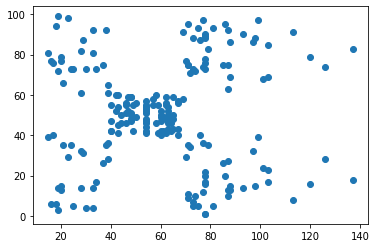

In [48]:
plt.scatter(x["Income"],x["Spending"])

In [49]:
from sklearn.cluster import KMeans

In [50]:
model=KMeans(n_clusters=2)
model.fit(x)
cn=model.predict(x)

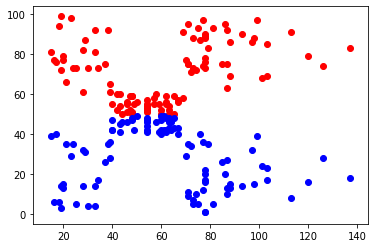

In [51]:
plt.scatter(x["Income"][cn==0],x["Spending"][cn==0],c="r")
plt.scatter(x["Income"][cn==1],x["Spending"][cn==1],c="b")

In [52]:
#for value of n_cluster we need to find elbo value of wcss values 
model=KMeans(n_clusters=5)
model.fit(x)
cn=model.predict(x)

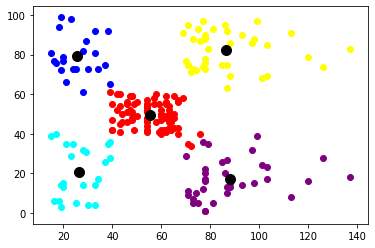

In [54]:
plt.scatter(x["Income"][cn==0],x["Spending"][cn==0],c="red")
plt.scatter(x["Income"][cn==1],x["Spending"][cn==1],c="blue")
plt.scatter(x["Income"][cn==2],x["Spending"][cn==2],c="yellow")
plt.scatter(x["Income"][cn==3],x["Spending"][cn==3],c="cyan")
plt.scatter(x["Income"][cn==4],x["Spending"][cn==4],c="purple")

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c="black",s=100)

# find wcss(how much number of cluster values need )

In [32]:
model=KMeans(n_clusters=2)
model.fit(x)
model.inertia_

183729.48932676518

In [33]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

In [34]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 31577.726355851446,
 25018.576334776335,
 21866.28125266371,
 20080.727373148675]

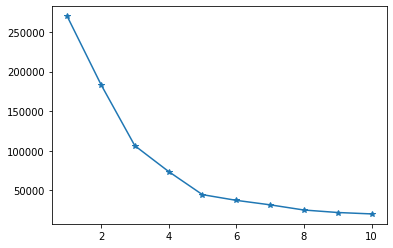

In [35]:
plt.plot(range(1,11),wcss,marker="*")

elbo value us 5 so need 5 n_clusters acording to graph